In [2]:
import torch
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (13, 5)

Text(0.5, 1.0, 'Train data without noise')

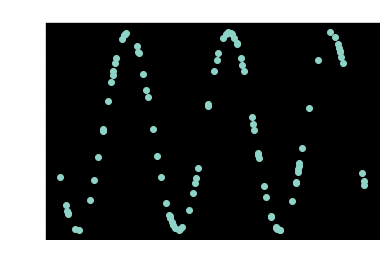

In [3]:
# Initilize train data
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('Train data without noise')

tensor(0.3036)


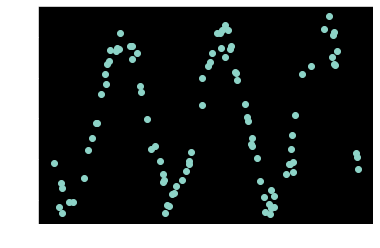

In [4]:
# Add some noise to data
noise = torch.randn(y_train.shape) / 8.0
print(max(noise))
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')

In [5]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

Text(0.5, 1.0, 'Valid_data')

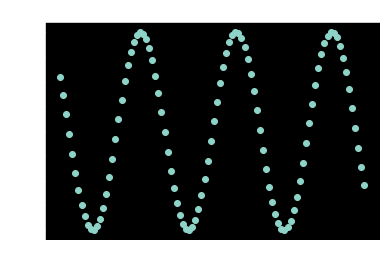

In [6]:
# validation data
x_valid = torch.linspace(-10, 10, 100)
y_valid = torch.sin(x_valid.data)

plt.plot(x_valid.numpy(), y_valid.numpy(), 'o')
plt.title('Valid_data')

In [7]:
x_valid.unsqueeze_(1)
y_valid.unsqueeze_(1);

In [17]:
# construct NNet
class SinNet(torch.nn.Module):
    def __init__(self, n_hid_neurons):
        super(SinNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hid_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hid_neurons, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sinenet = SinNet(30)

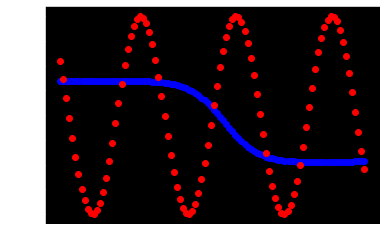

In [9]:
# stupid prediction
y_pred = sinenet.forward(x_valid)

plt.plot(x_valid.numpy()[:,0], y_pred.data.numpy()[:,0], 'o', c='b')
plt.plot(x_valid.numpy(), y_valid.numpy(), 'o', c='r')

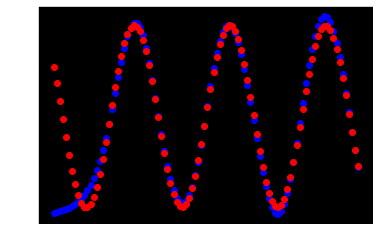

In [20]:
# try train
optimizer = torch.optim.Adam(sinenet.parameters(), lr = 0.01)
def loss_func(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()


for epoch in range(2000):
    optimizer.zero_grad()
    
    y_pred = sinenet.forward(x_train)
    loss_val = loss_func(y_pred, y_train)
    loss_val.backward()
    optimizer.step()

y_pred = sinenet.forward(x_valid)

plt.plot(x_valid.numpy()[:,0], y_pred.data.numpy()[:,0], 'o', c='b')
plt.plot(x_valid.numpy(), y_valid.numpy(), 'o', c='r')